In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

cifar=tf.keras.datasets.cifar10
(training_data,training_labels),(testing_data,testing_labels)=cifar.load_data()
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
training_data.shape

(50000, 32, 32, 3)

In [ ]:
training_labels.shape

(50000, 1)

In [ ]:
training_data=training_data/255.0
testing_data=testing_data/255.0

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(256,(3,3),activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_data,training_labels,epochs=80)

Epoch 1/80
1563/1563 [==============================] - 15s 7ms/step - loss: 1.6238 - accuracy: 0.4055
Epoch 2/80
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2382 - accuracy: 0.5588
Epoch 3/80
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0967 - accuracy: 0.6128
Epoch 4/80
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0073 - accuracy: 0.6458
Epoch 5/80
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9384 - accuracy: 0.6712
Epoch 6/80
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8919 - accuracy: 0.6891
Epoch 7/80
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8515 - accuracy: 0.7047
Epoch 8/80
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8111 - accuracy: 0.7150
Epoch 9/80
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7864 - accuracy: 0.7254
Epoch 10/80
1563/1563 [==============================] - 9s 6ms/step - loss

In [ ]:
test_loss,test_accuracy=model.evaluate(testing_data,testing_labels)

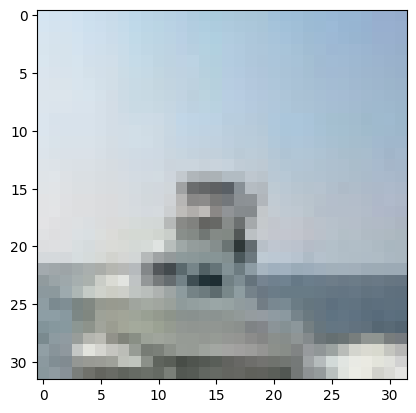

In [ ]:
plt.imshow(training_data[100])

In [ ]:
(training_data_example,training_labels_example),(testing_data_example,testing_labels_example)=cifar.load_data()

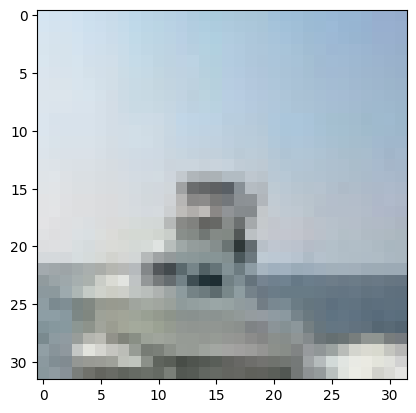

In [ ]:
plt.imshow(training_data_example[100])

In [ ]:
predictions=model.predict(testing_data)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[8.02356750e-03, 9.61451097e-09, 6.91386813e-05, ...,
        2.02467851e-03, 3.11824819e-03, 3.23927942e-08],
       [2.27159435e-05, 1.43542841e-01, 1.92691295e-32, ...,
        4.14156309e-28, 8.56434405e-01, 3.66035632e-14],
       [1.02896774e-04, 5.89003378e-07, 2.40661375e-08, ...,
        2.85785240e-09, 9.99896407e-01, 1.45787924e-08],
       ...,
       [1.02105996e-18, 1.21233121e-17, 4.17307326e-08, ...,
        2.12009439e-07, 1.49293745e-13, 4.95332231e-23],
       [1.62195573e-08, 9.99999881e-01, 1.03816988e-09, ...,
        4.22307935e-12, 2.47060212e-13, 3.53677569e-12],
       [2.03322171e-22, 1.55302584e-21, 3.97501170e-15, ...,
        9.99999881e-01, 3.67604370e-24, 3.51958690e-28]], dtype=float32)

In [ ]:
predictions[31]

array([2.8102937e-10, 3.4537184e-08, 5.2236754e-04, 2.6323317e-02,
       1.7770153e-04, 9.7291476e-01, 3.2601222e-06, 5.8552596e-05,
       2.4249558e-09, 9.0171398e-10], dtype=float32)

In [ ]:
np.argmax(predictions[31])

5

In [ ]:
classes[np.argmax(predictions[31])]

'dog'

In [ ]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
